In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
path_crime= pd.read_csv('RMS.csv')
path_crime.head()

,ARREST_DATE,DATE,YEAR,MONTH,WEEK,SEX,RACE,ETHNIC,FBI,SID,...,INVOLVEMENT,INCIDENT_NUM,OFFENSE_CODE,OFFENSE-DESC,RMS_DESCRIPTION,GIS_ARCTYPE,DISTRICT,CITY,STATE,ZIP
0,1/1/2016,1/1/2016,2016,JANUARY,1,F,W,N,NaN,NaN,...,A,SAPD16000022,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,NaN,SAN ANTONIO (BE),TX,78205
1,1/1/2016,1/1/2016,2016,JANUARY,1,M,W,H,NaN,NaN,...,A,SAPD16000026,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,5230,SAN ANTONIO,TX,78201
2,1/1/2016,1/1/2016,2016,JANUARY,1,M,W,H,NaN,664565,...,A,SAPD16056633,56,Other Crimes,WNTD PERS,OTHER,4350,SAN ANTONIO,TX,78218
3,1/1/2016,1/1/2016,2016,JANUARY,1,M,W,H,NaN,1049997,...,A,SAPD16000052,131352,Family Violence,ASSAULT BODILY INJURY-MARRIED/COHAB,VIOLENT,2240,SAN ANTONIO,TX,78201
4,1/1/2016,1/1/2016,2016,JANUARY,1,F,W,H,NaN,964686,...,A,SAPD16000030,131352,Family Violence,ASSAULT BODILY INJURY-MARRIED/COHAB,VIOLENT,2340,SAN ANTONIO,TX,78207


In [3]:
path_crime.sort_values(by='MONTH',ascending=True)

,ARREST_DATE,DATE,YEAR,MONTH,WEEK,SEX,RACE,ETHNIC,FBI,SID,...,INVOLVEMENT,INCIDENT_NUM,OFFENSE_CODE,OFFENSE-DESC,RMS_DESCRIPTION,GIS_ARCTYPE,DISTRICT,CITY,STATE,ZIP
161861,4/20/2018,4/20/2018,2018,APRIL,16,M,W,N,NaN,NaN,...,A,SAPD18081607,COV2127,Other Crimes,COV - URINATING OR DEFECATING IN PUBLIC,OTHER,2120,SAN ANTONIO,TX,78205
162291,4/21/2018,4/21/2018,2018,APRIL,16,M,B,N,NaN,NaN,...,A,SAPD18082950,570701,Trespassing,CRIMINAL TRESPASS-PRIVATE PROP,OTHER,4140,SAN ANTONIO,TX,78202
162292,4/21/2018,4/21/2018,2018,APRIL,16,M,B,N,NaN,NaN,...,A,SAPD18082950,480105,Obstruction of Justice,RESIST ARR-SEARCH-TRANSPORTATION,OTHER,4140,SAN ANTONIO,TX,78202
162293,4/21/2018,4/21/2018,2018,APRIL,16,M,B,N,NaN,NaN,...,A,SAPD18082950,480612,Obstruction of Justice,FAIL ID TO P-O - FALSE/FICT INFO,OTHER,4140,SAN ANTONIO,TX,78202
162294,4/21/2018,4/21/2018,2018,APRIL,16,M,W,N,NaN,850911,...,A,SAPD18082949,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,3120,SAN ANTONIO,TX,78216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193948,9/3/2018,9/3/2018,2018,SEPTEMBER,36,M,B,N,NaN,NaN,...,A,SAPD18188411,356208,Drug Arrest,POSS MHA UNDER 2 OZ - DRUG-FREE ZONE,DRUG,2310,SAN ANTONIO,TX,78207
193949,9/3/2018,9/3/2018,2018,SEPTEMBER,36,F,W,H,NaN,452058,...,A,SAPD18188428,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,2310,SAN ANTONIO,TX,78207
193950,9/3/2018,9/3/2018,2018,SEPTEMBER,36,M,B,N,NaN,338033,...,A,SAPD18188490,269924,Other Crimes,"MONEY LAUND $1500-$20,000",OTHER,4310,SAN ANTONIO,TX,78219
193944,9/3/2018,9/3/2018,2018,SEPTEMBER,36,M,W,H,NaN,NaN,...,A,SAPD18188422,3006A,Drug Arrest,POSS DRUG PARAPHERNALIA,DRUG,2110,SAN ANTONIO,TX,78205


In [4]:
path_crime['MONTH'] = path_crime['MONTH'].replace(
    {'JANUARY': '01-JAN', 'FEBRUARY': '02-Feb', 'MARCH':'03-MAR',"APRIL":'04-Apr', 'MAY':'05-May', 'JUNE':'06-June', 'JULY':'07-JUL', 'AUGUST':'08-Aug', 'SEPTEMBER':'09-Sep', 'OCTOBER':'10-Oct', 'NOVEMBER':'11-Nov','DECEMBER':'12-Dec'})

In [5]:
Num_months=path_crime.loc[:,"MONTH"]
#print(Num_months)
Num_months.value_counts()

Type_desc= path_crime.loc[:,"OFFENSE-DESC"]
Type_desc.value_counts()



group_month = path_crime.groupby(["MONTH"]).count()["OFFENSE-DESC"]
group_month

#print(group_month)

MONTH
01-JAN     17578
02-Feb     16505
03-MAR     18854
04-Apr     18770
05-May     19573
06-June    18804
07-JUL     19429
08-Aug     18761
09-Sep     18757
10-Oct     18065
11-Nov     16938
12-Dec     17189
Name: OFFENSE-DESC, dtype: int64

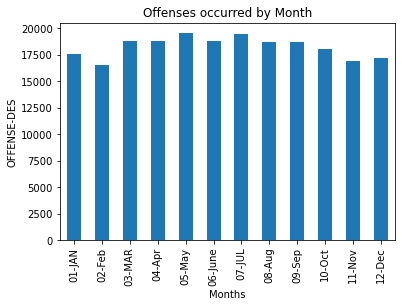

<Figure size 432x288 with 0 Axes>

In [6]:
grouped_dm = path_crime.groupby(["MONTH"]).count()["OFFENSE-DESC"]
grouped_dm

crime_chart= grouped_dm.plot(kind="bar", title= "")
crime_chart.set_xlabel("Months")
crime_chart.set_ylabel("OFFENSE-DES")
plt.title('Offenses occurred by Month')
plt.show()
plt.tight_layout()

In [7]:
#sorted(group_month)

In [8]:
Type_desc.value_counts()

Other Crimes                         82101
Drug Arrest                          39779
TABC-Liquor Law Violation            28037
Larceny                              16305
Obstruction of Justice                9056
Family Violence                       7856
Panhandling                           5622
Trespassing                           4286
Weapon Violation                      3719
Traffic Violation                     3517
Assault                               2481
Prostitution                          2381
Driving While Intoxicated             1933
Fraud                                 1498
Aggravated Assault                    1374
Vandalism                             1369
Aggravated Family Violence             900
Theft of Vehicle                       882
Burglary Vehicle                       695
Threats                                634
Deadly Conduct                         623
Unauthorized Use of Motor Vehicle      446
Aggravated Robbery Individual          443
Burglary Ha

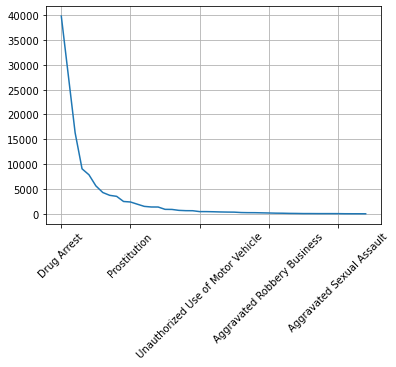

In [9]:
Type_desc.value_counts().drop('Other Crimes').plot(rot=45,grid=True)

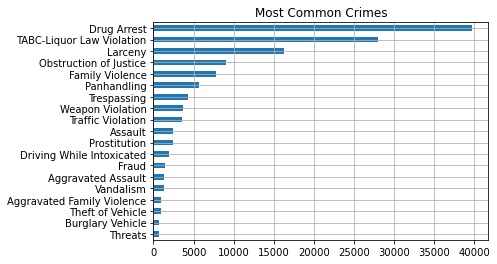

<Figure size 432x288 with 0 Axes>

In [10]:
df = Type_desc.value_counts()[1:20].sort_values(ascending=True)
df.plot(kind='barh',grid=True)
plt.title('Most Common Crimes')
plt.show()
plt.savefig("figure.png")

In [11]:
path_crime.head(1)

,ARREST_DATE,DATE,YEAR,MONTH,WEEK,SEX,RACE,ETHNIC,FBI,SID,...,INVOLVEMENT,INCIDENT_NUM,OFFENSE_CODE,OFFENSE-DESC,RMS_DESCRIPTION,GIS_ARCTYPE,DISTRICT,CITY,STATE,ZIP
0,1/1/2016,1/1/2016,2016,01-JAN,1,F,W,N,NaN,NaN,...,A,SAPD16000022,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,NaN,SAN ANTONIO (BE),TX,78205


In [12]:
df = Type_desc.sort_values(ascending=True)
df.plot(kind='barh',grid=True)
plt.title('Most Common Crimes')
plt.show()


TypeError: no numeric data to plot

In [13]:
path_crime.columns

Index(['ARREST_DATE', 'DATE', 'YEAR', 'MONTH', 'WEEK', 'SEX', 'RACE', 'ETHNIC',
       'FBI', 'SID', 'DOB', 'AGE', 'INVOLVEMENT', 'INCIDENT_NUM',
       'OFFENSE_CODE', 'OFFENSE-DESC', 'RMS_DESCRIPTION', 'GIS_ARCTYPE',
       'DISTRICT', 'CITY', 'STATE', 'ZIP'],
      dtype='object')

In [14]:
df2 = path_crime[['MONTH','OFFENSE-DESC','AGE']].rename(columns={'OFFENSE-DESC':'OFFENSE', 'AGE':'COUNT'})
#df2.groupby(['MONTH','OFFENSE']).count()
print(df2.groupby(['MONTH','OFFENSE']).count())

                                          COUNT
MONTH  OFFENSE                                 
01-JAN Aggravated Assault                    78
       Aggravated Family Violence            75
       Aggravated Robbery Business           15
       Aggravated Robbery Individual         37
       Aggravated Sexual Assault              4
...                                         ...
12-Dec Traffic Violation                    284
       Trespassing                          303
       Unauthorized Use of Motor Vehicle     40
       Vandalism                             94
       Weapon Violation                     299

[518 rows x 1 columns]


In [15]:
data_crime2=df2.groupby(['MONTH','OFFENSE']).count()
print(data_crime2)

                                          COUNT
MONTH  OFFENSE                                 
01-JAN Aggravated Assault                    78
       Aggravated Family Violence            75
       Aggravated Robbery Business           15
       Aggravated Robbery Individual         37
       Aggravated Sexual Assault              4
...                                         ...
12-Dec Traffic Violation                    284
       Trespassing                          303
       Unauthorized Use of Motor Vehicle     40
       Vandalism                             94
       Weapon Violation                     299

[518 rows x 1 columns]


In [16]:
data_crime2.agg(["max","count"])

,COUNT
max,7278
count,518


In [17]:
#data_crime2=df2(['MONTH','OFFENSE']).count()
#("COUNT").first()

In [18]:
data_crime2.columns

Index(['COUNT'], dtype='object')

In [19]:
print(data_crime2)

                                          COUNT
MONTH  OFFENSE                                 
01-JAN Aggravated Assault                    78
       Aggravated Family Violence            75
       Aggravated Robbery Business           15
       Aggravated Robbery Individual         37
       Aggravated Sexual Assault              4
...                                         ...
12-Dec Traffic Violation                    284
       Trespassing                          303
       Unauthorized Use of Motor Vehicle     40
       Vandalism                             94
       Weapon Violation                     299

[518 rows x 1 columns]


In [20]:
data_crime2.filter(lambda x: x["COUNT"])

TypeError: 'function' object is not iterable

In [21]:
data_crime2=data_crime.groupby(["MONTH"]).max()
print(data_crime2)

NameError: name 'data_crime' is not defined

In [22]:
data_c= data_crime2.loc[:,"OFFENSE"]
data_d= pd.Series(data_c,name= "OFFENSE")

KeyError: 'OFFENSE'

In [23]:
#data_crime.loc[data_crime.groupby(["MONTH"])["OFFENSE"].idxmax()]
#groupby for months
#groupby for crime

In [31]:
#for i, row in data_crime2.iterrows():
   # print(row["MONTH"])
    
for OFFENSE in data_crime2:
    print(OFFENSE)
    


COUNT


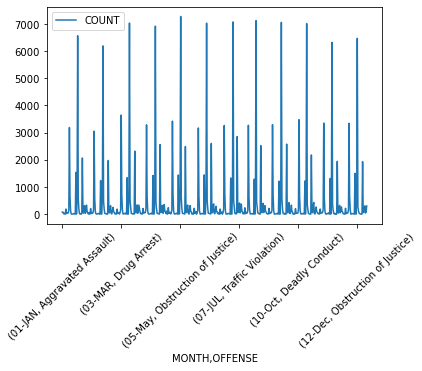

In [32]:
df2 = path_crime[['MONTH','OFFENSE-DESC','AGE']].rename(columns={'OFFENSE-DESC':'OFFENSE', 'AGE':'COUNT'})
df2.groupby(['MONTH','OFFENSE']).count().plot(rot=45)

119907    Aggravated Assault
28065     Aggravated Assault
207295    Aggravated Assault
141301    Aggravated Assault
47813     Aggravated Assault
Name: OFFENSE-DESC, dtype: object

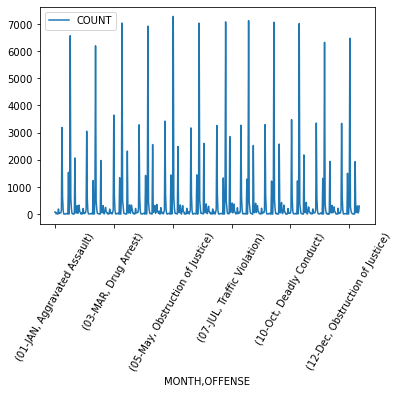

In [26]:
df2.groupby(['MONTH','OFFENSE']).count().plot(rot=60)
df2.loc[path_crime['MONTH']=="Drug Arrest",:]
df.head(5)

In [27]:
x_value=path_crime["MONTH"]
y_value= path_crime["OFFENSE-DESC"]

In [28]:
offense_df = df2.loc[df2["MONTH"] == "NOVEMBER",:]
offense_df.head()




,MONTH,OFFENSE,COUNT


In [29]:
offense_df.groupby(['MONTH','OFFENSE']).count()

,,COUNT
MONTH,OFFENSE,


In [30]:
named_billy = offense_df.loc[offense_df["MONTH"] :["NOVEMBER"],
                             ["OFFENSE"]:["Drug Arrest"]]
print(named_billy)



TypeError: 'Series([], Name: MONTH, dtype: object)' is an invalid key

In [47]:
offense_df['count_max'] = offense_df.groupby(['MONTH'])['COUNT'].transform(max)

<ipython-input-47-46743d063e53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_df['count_max'] = offense_df.groupby(['MONTH'])['COUNT'].transform(max)


In [48]:
filter(lambda x: x["COUNT"])

TypeError: filter expected 2 arguments, got 1

In [49]:
#Nov_data.loc[Nov_data["OFFENSE"]==max]

In [50]:
#for row in csvreader:
       # if row[0] == video:
          #  print(row[0] + " is rated " + row[1] +
                 # " with a rating of " + row[5])
#
            # Set variable to confirm we have found the video
           # found = True

    # If the video is never found, alert the user
#if found == False:
        #print("We don't seem to have what you are looking for!")

In [51]:
#Nov_offense = offense_df.loc[df2["NOVEMBER"] == "DRUG ARREST",:]
#print(Nov_offense)

In [38]:
path_crime['MONTH'] = path_crime['MONTH'].replace(
    {'JANUARY': '01-JAN', 'FEBRUARY': '02-Feb', 'MARCH':'03-MAR',"APRIL":'04-Apr', 'MAY':'05-May', 'JUNE':'06-June', 'JULY':'07-JUL', 'AUGUST':'08-Aug', 'SEPTEMBER':'09-Sep', 'OCTOBER':'10-Oct', 'NOVEMBER':'11-Nov','DECEMBER':'12-Dec'})

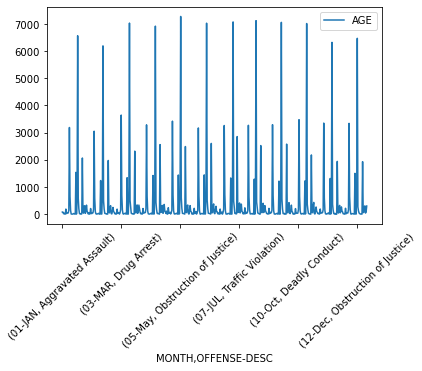

In [43]:
df2 = path_crime[['MONTH','OFFENSE-DESC','AGE']].replace({'JANUARY': '01-JAN', 'FEBRUARY': '02-Feb', 'MARCH':'03-MAR',"APRIL":'04-Apr', 'MAY':'05-May', 'JUNE':'06-June', 'JULY':'07-JUL', 'AUGUST':'08-Aug', 'SEPTEMBER':'09-Sep', 'OCTOBER':'10-Oct', 'NOVEMBER':'11-Nov','DECEMBER':'12-Dec'})
df2.groupby(['MONTH','OFFENSE-DESC']).count().plot(rot=45)




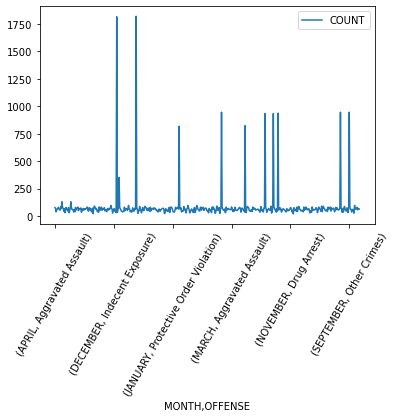

In [53]:
df2.groupby(['MONTH','OFFENSE']).max().plot(rot=60)



In [54]:
months_one= df2["MONTH"].value_counts()

In [59]:
x_value = path_crime["YEAR"]
y_value = path_crime["COUNT"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average  (Tumor Volume (mm3)')
plt.title('Correlation of Tumor vs Timepoint')
plt.show()

KeyError: 'COUNT'

In [ ]:
# Use DataFrame.plot() in order to create a bar chart of the data


In [ ]:
sixty_age= most_popular_offenses.loc["60-69",:]
# popular_formatted = most_popular_offenses.sort_values(["Offense Count"], ascending=False)
top_sixty = sixty_age.idxmax()
print(top_sixty)